# 3a. Logistic Regression - Serve Statistics

#### Using logistic regression, the three serve statistics are tested to see their correlation with the likelihood of winning a match on the ATP tour. Statistics for the winner and loser were created and a new variable was added (1 for a match won and 0 for a match lost). The two dataframes were then combined and are ready for the regression.

# Table of Content
## 1. Load and Verify Data
## 2. Separate and Rename Columns
## 3. Combine the Dataframes
## 4. Train the Logistic Regression and Plot
## 5. Export Dataframe (for use on Tableau)

## Step 1: Load and Verify Data

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Set Path
path = r'/Users/tristansavella/Desktop/Important Things/Data Analytics/CareerFoundry/Data Immersion/Achievement 6/Master Folder ATP/02 Data'

In [3]:
#Import df_matchstats
df_matchstats = pd.read_pickle(os.path.join(path, 'Prepared Data','df_matchstats.pkl'))

In [4]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [5]:
df_matchstats.head()

,tourney_id,Year,tourney_name,surface,tourney_level,winner_id,winner_ioc,winner_name,winner_age,winner_rank,winner_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_ht,loser_age,best_of,round,minutes,w_#ServeGames,w_#aces,w_#dfs,w_#ServePoints,w_#1stServesIn,w_#2ndServePoints,w_%1stServesIn,w_#1stWon,w_%1stWon,w_#2ndWon,w_%2ndWon,w_bpSaved,w_#bpFaced,l_#ServeGames,l_#aces,l_#dfs,l_#ServePoints,l_#1stServesIn,l_#2ndServePoints,l_%1stServesIn,l_#1stWon,l_%1stWon,l_#2ndWon,l_%2ndWon,l_bpSaved,l_#bpFaced
119317,2000-301,2000,Auckland,Hard,A,103163,GER,Tommy Haas,21.7,11.0,188.0,101543,USA,Jeff Tarango,63.0,180.0,31.1,3,R32,108.0,17.0,18.0,4.0,96.0,49.0,47.0,51,39.0,79,28.0,59,3.0,5.0,17.0,7.0,8.0,106.0,55.0,51.0,51,39.0,70,29.0,56,4.0,7.0
119318,2000-301,2000,Auckland,Hard,A,102607,ESP,Juan Balcells,24.5,211.0,190.0,102644,ARG,Franco Squillari,49.0,183.0,24.3,3,R32,85.0,12.0,5.0,3.0,76.0,52.0,24.0,68,39.0,75,13.0,54,5.0,6.0,12.0,5.0,10.0,74.0,32.0,42.0,43,25.0,78,18.0,42,3.0,6.0
119319,2000-301,2000,Auckland,Hard,A,103252,ESP,Alberto Martin,21.3,48.0,175.0,102238,ESP,Alberto Berasategui,59.0,173.0,26.5,3,R32,56.0,8.0,0.0,0.0,55.0,35.0,20.0,63,25.0,71,12.0,60,1.0,1.0,8.0,0.0,6.0,56.0,33.0,23.0,58,20.0,60,7.0,30,7.0,11.0
119320,2000-301,2000,Auckland,Hard,A,103507,ESP,Juan Carlos Ferrero,19.9,45.0,183.0,103819,SUI,Roger Federer,61.0,185.0,18.4,3,R32,68.0,10.0,5.0,1.0,53.0,28.0,25.0,52,26.0,92,15.0,60,0.0,0.0,10.0,11.0,2.0,70.0,43.0,27.0,61,29.0,67,14.0,51,6.0,8.0
119321,2000-301,2000,Auckland,Hard,A,102103,USA,Michael Sell,27.3,167.0,180.0,102765,FRA,Nicolas Escude,34.0,185.0,23.7,3,R32,115.0,13.0,1.0,2.0,98.0,66.0,32.0,67,39.0,59,14.0,43,6.0,11.0,12.0,8.0,8.0,92.0,46.0,46.0,50,34.0,73,18.0,39,5.0,9.0


In [6]:
# Drop columns with NaN values
df_matchstats.dropna(axis=1, inplace=True)

In [7]:
# Verify initial columns
print("Initial Columns:", df_matchstats.columns.tolist())

Initial Columns: ['tourney_id', 'Year', 'tourney_name', 'surface', 'tourney_level', 'winner_id', 'winner_ioc', 'winner_name', 'winner_age', 'loser_id', 'loser_ioc', 'loser_name', 'best_of', 'round', 'w_#ServeGames', 'w_#aces', 'w_#dfs', 'w_#ServePoints', 'w_#1stServesIn', 'w_#2ndServePoints', 'w_%1stServesIn', 'w_#1stWon', 'w_%1stWon', 'w_#2ndWon', 'w_%2ndWon', 'w_bpSaved', 'w_#bpFaced', 'l_#ServeGames', 'l_#aces', 'l_#dfs', 'l_#ServePoints', 'l_#1stServesIn', 'l_#2ndServePoints', 'l_%1stServesIn', 'l_#1stWon', 'l_%1stWon', 'l_#2ndWon', 'l_%2ndWon', 'l_bpSaved', 'l_#bpFaced']


# Step 2: Separate and Rename Columns

In [8]:
# Create separate DataFrames for winner and loser statistics
winners = df_matchstats.copy()
losers = df_matchstats.copy()

In [9]:
# Add a target variable to each DataFrame
winners['win'] = 1
losers['win'] = 0

In [10]:
# Rename columns for losers to ensure uniqueness
losers.rename(columns={
    'l_%1stServesIn': '1stServesIn', 
    'l_%1stWon': '1stWon', 
    'l_%2ndWon': '2ndWon'
}, inplace=True)

In [11]:
# Rename columns for winners to ensure consistency
winners.rename(columns={
    'w_%1stServesIn': '1stServesIn', 
    'w_%1stWon': '1stWon', 
    'w_%2ndWon': '2ndWon'
}, inplace=True)

In [12]:
# Extract relevant columns
winners_renamed = winners[['1stServesIn', '1stWon', '2ndWon', 'win']]
losers_renamed = losers[['1stServesIn', '1stWon', '2ndWon', 'win']]

In [13]:
# Verify the column names after renaming
print("Winners Renamed Columns:", winners_renamed.columns.tolist())
print("Losers Renamed Columns:", losers_renamed.columns.tolist())

Winners Renamed Columns: ['1stServesIn', '1stWon', '2ndWon', 'win']
Losers Renamed Columns: ['1stServesIn', '1stWon', '2ndWon', 'win']


# Step 3: Combine the DataFrames

In [14]:
# Combine the DataFrames
combined_df = pd.concat([winners_renamed, losers_renamed], ignore_index=True)

# Verify the combined DataFrame
print("Combined DataFrame Columns:", combined_df.columns.tolist())
print(combined_df.head())

Combined DataFrame Columns: ['1stServesIn', '1stWon', '2ndWon', 'win']
   1stServesIn  1stWon  2ndWon  win
0           51      79      59    1
1           68      75      54    1
2           63      71      60    1
3           52      92      60    1
4           67      59      43    1


# Step 4: Train the Logistic Regression Model and Plot

In [15]:
# Define the features and target variable
features = combined_df[['1stServesIn', '1stWon', '2ndWon']]
target = combined_df['win']

In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [17]:
# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Make predictions and evaluate the model
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [19]:
print(f'Classification Model Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Classification Model Accuracy: 0.7902606748760594
Confusion Matrix:
 [[9794 2606]
 [2640 9972]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79     12400
           1       0.79      0.79      0.79     12612

    accuracy                           0.79     25012
   macro avg       0.79      0.79      0.79     25012
weighted avg       0.79      0.79      0.79     25012



In [20]:
# Get the coefficients of the logistic regression model
coefficients = log_reg.coef_[0]
feature_names = features.columns

In [21]:
# Create a DataFrame for feature importance (coefficients)
importance_df = pd.DataFrame({'Serve Statistic': feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)
print(importance_df)

  Serve Statistic  Coefficient
1          1stWon     0.139635
2          2ndWon     0.100579
0     1stServesIn     0.044955


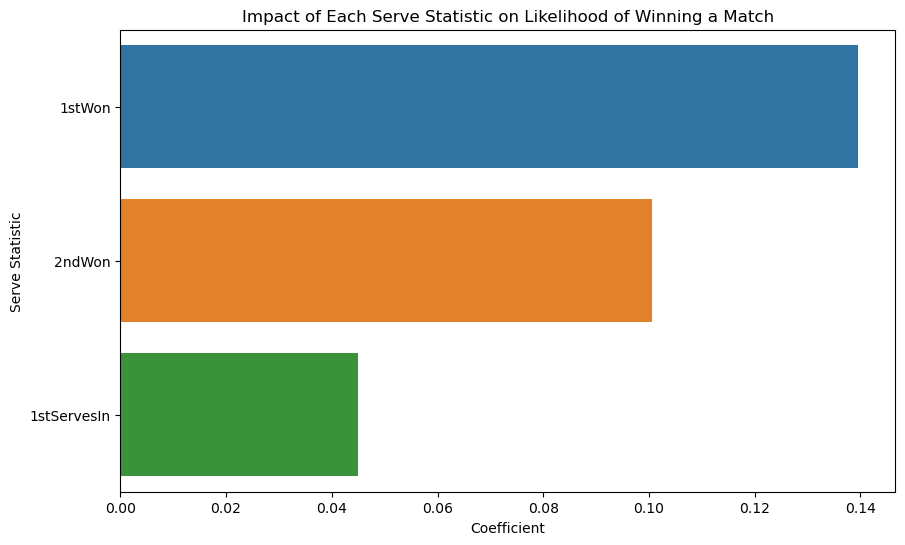

In [22]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Serve Statistic', data=importance_df)
plt.title('Impact of Each Serve Statistic on Likelihood of Winning a Match')
plt.show()

# Step 5: Export Combined Dataset

In [37]:
combined_df.to_pickle(os.path.join(path, 'Prepared Data','combined_df.pkl'))

In [23]:
#as CSV
combined_df.to_csv(os.path.join(path,'Prepared Data CSV','combined_df.csv'))

In [24]:
importance_df.head()

,Serve Statistic,Coefficient
1,1stWon,0.139635
2,2ndWon,0.100579
0,1stServesIn,0.044955
